# Geographical Visualizations

### This script contains the following points:
1. Importing libraries
2. Importing data
3. Importing JSON file
4. Wrangling data as necessary
5. Cleaning data & consistency checks
6. Creating choropleth maps:
    * Mother age by state
    * Birth weight by state
    * Gestational age by state
    * Birth count by state in 2021

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
%matplotlib inline

### 2. Importing data

In [3]:
path = r'C:\Users\keely\Documents\Courses\CareerFoundry\Immersion\Achievement 6 - Advanced Analytics_Dashboard\2019-2021 CDC Natality'

In [4]:
# Import latest natality dataframe.

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_flags.pkl'))

In [5]:
df.head()

,index,state,year,month,month_code,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,date,season,region,birth_wt_alert,gest_age_alert,mother_age_range,birth_wt_cat,gest_age_cat
0,0,Alabama,2019,January,1,high school GED or less,10,34,3223.149902,27.440001,38.820000,2019-01-01,Winter,South,NBW,not preterm,26-28,average,old
1,1,Alabama,2019,January,1,high school GED or less,2,30,3482.770020,29.930000,39.070000,2019-01-01,Winter,South,NBW,not preterm,28-30,highest,oldest
2,2,Alabama,2019,January,1,high school GED or less,3,25,3251.959961,30.760000,38.639999,2019-01-01,Winter,South,NBW,not preterm,30-32,average,old
3,3,Alabama,2019,January,1,high school GED or less,4,25,3120.399902,28.639999,38.119999,2019-01-01,Winter,South,NBW,not preterm,28-30,low,young
4,4,Alabama,2019,January,1,high school GED or less,5,12,2938.080078,27.920000,37.500000,2019-01-01,Winter,South,NBW,not preterm,26-28,lowest,youngest


In [6]:
df.shape

(86437, 19)

### 3. Importing JSON file

In [7]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\keely\Documents\Courses\CareerFoundry\Immersion\Achievement 6 - Advanced Analytics_Dashboard\Lesson Tasks\6.3 Lesson\Data\us-states.json'

In [8]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\keely\Documents\Courses\CareerFoundry\Immersion\Achievement 6 - Advanced Analytics_Dashboard\Lesson Tasks\6.3 Lesson\Data\us-states.json')
  
# returns JSON object as a dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

### 4. Wrangling data as necessary

In [9]:
columns = ["state",
"mother_ed",
"mother_age_avg",
"births",
"birth_wt_avg",
"gest_age_avg"
]

In [10]:
state_nat = df[columns]

In [11]:
state_nat.head()

,state,mother_ed,mother_age_avg,births,birth_wt_avg,gest_age_avg
0,Alabama,high school GED or less,27.440001,34,3223.149902,38.820000
1,Alabama,high school GED or less,29.930000,30,3482.770020,39.070000
2,Alabama,high school GED or less,30.760000,25,3251.959961,38.639999
3,Alabama,high school GED or less,28.639999,25,3120.399902,38.119999
4,Alabama,high school GED or less,27.920000,12,2938.080078,37.500000


### 5. Cleaning data & consistency checks

In [12]:
# Check for missing values.

state_nat.isnull().sum()

state             0
mother_ed         0
mother_age_avg    0
births            0
birth_wt_avg      0
gest_age_avg      0
dtype: int64

In [13]:
# Checking for duplicates.

dups = state_nat[state_nat.duplicated()]
dups


,state,mother_ed,mother_age_avg,births,birth_wt_avg,gest_age_avg


In [14]:
# Brief check for mixed data types. More effective than function that looks for mixed types.

state_nat.dtypes

state              object
mother_ed          object
mother_age_avg    float32
births              int32
birth_wt_avg      float32
gest_age_avg      float32
dtype: object

<AxesSubplot:xlabel='mother_age_avg', ylabel='Count'>

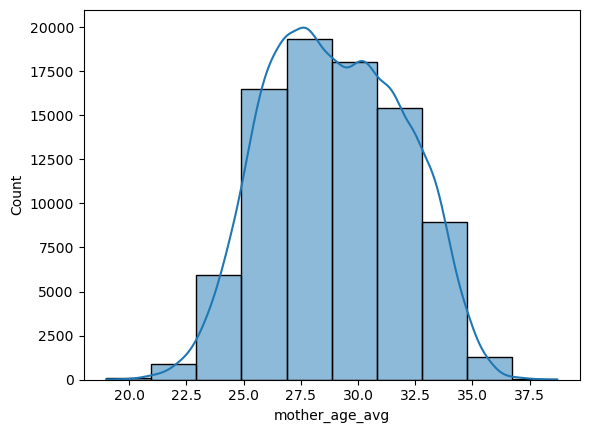

In [15]:
# Extreme value checks.

sns.histplot(state_nat['mother_age_avg'], bins=10, kde = True) # shows extreme values for 'mother_age_avg.'

<AxesSubplot:xlabel='births', ylabel='Count'>

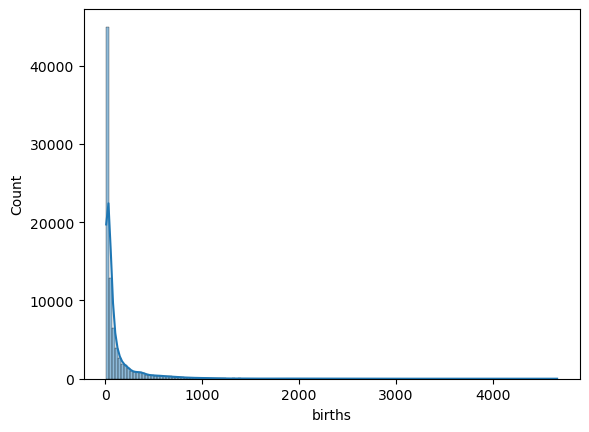

In [16]:
sns.histplot(state_nat['births'], bins=150, kde = True) # shows extreme values for 'births.'

In [17]:
# Check how many extreme values

state_nat[state_nat['births'] > 2000]

,state,mother_ed,mother_age_avg,births,birth_wt_avg,gest_age_avg
2182,California,high school GED or less,27.760000,4142,3282.649902,38.619999
2183,California,high school GED or less,27.600000,2136,3315.520020,38.709999
2193,California,associate degree or some college,28.930000,3522,3299.850098,38.590000
2214,California,bachelor's degree,32.580002,4141,3291.239990,38.740002
2270,California,high school GED or less,27.780001,3609,3293.149902,38.660000
...,...,...,...,...,...,...
83031,Texas,high school GED or less,26.420000,2902,3218.479980,38.389999
83032,Texas,high school GED or less,26.780001,2568,3205.800049,38.340000
83042,Texas,associate degree or some college,28.180000,2251,3237.689941,38.419998
83064,Texas,bachelor's degree,31.340000,2424,3297.129883,38.630001


#### The above seems reasonable given that the records with high births are in Texas and California, very populated states.

<AxesSubplot:xlabel='birth_wt_avg', ylabel='Count'>

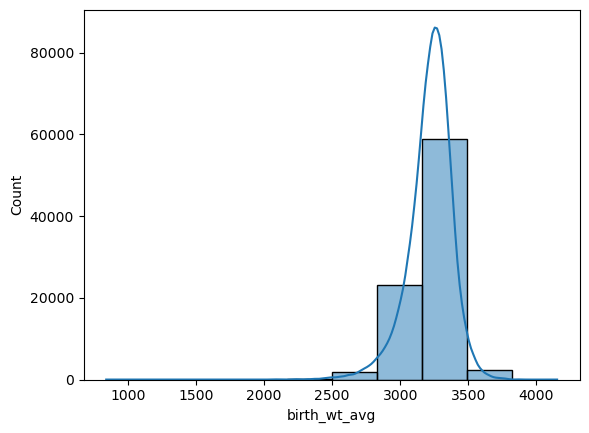

In [18]:
sns.histplot(state_nat['birth_wt_avg'], bins=10, kde = True) # shows extreme values for 'birth_wt_avg.'

In [19]:
state_nat[state_nat['birth_wt_avg'] > 4000]

,state,mother_ed,mother_age_avg,births,birth_wt_avg,gest_age_avg
70138,Massachusetts,associate degree or some college,28.450001,22,4152.5,39.5


#### One record for an average birth weight that is a high birth rate is reasonable. A few high birth weight infants may have caused the average to be high. Additonally, although it is a HBW average, it is not unreasonably high.

<AxesSubplot:xlabel='gest_age_avg', ylabel='Count'>

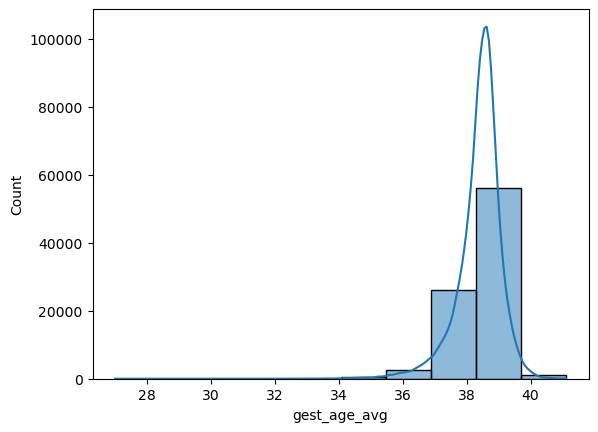

In [20]:
sns.histplot(state_nat['gest_age_avg'], bins=10, kde = True) # shows extreme values for 'gest_wt_average.'

In [21]:
state_nat[state_nat['gest_age_avg'] > 41]

,state,mother_ed,mother_age_avg,births,birth_wt_avg,gest_age_avg
55302,Virginia,high school GED or less,24.080000,13,3238.770020,41.080002
57940,Alabama,high school GED or less,27.670000,12,3248.919922,41.080002
63942,Georgia,high school GED or less,30.959999,27,3407.110107,41.110001
80181,Rhode Island,high school GED or less,26.209999,14,3322.139893,41.070000


#### Four averages with somewhat high gestational age seems reasonable.

### 6. Creating choropleth maps

In [22]:
mother_age = state_nat[['state','mother_age_avg','births']]
mother_age.head()

,state,mother_age_avg,births
0,Alabama,27.440001,34
1,Alabama,29.930000,30
2,Alabama,30.760000,25
3,Alabama,28.639999,25
4,Alabama,27.920000,12


In [23]:
mother_age.shape

(86437, 3)

In [24]:
# Creating a data frame with weighted averages of mother age by state.

ages_grouped = mother_age.groupby('state')
def wavg_ages(group):
    d = group['mother_age_avg']
    w = group['births']
    return(d*w).sum()/w.sum()

ages_grouped.apply(wavg_ages)

state
Alabama                 27.559113
Alaska                  28.772507
Arizona                 28.577970
Arkansas                27.118796
California              30.321112
Colorado                29.779356
Connecticut             30.830594
Delaware                29.307209
District of Columbia    31.655325
Florida                 29.402723
Georgia                 28.625574
Hawaii                  29.719637
Idaho                   28.373323
Illinois                29.724044
Indiana                 28.088432
Iowa                    28.758531
Kansas                  28.458974
Kentucky                27.601765
Louisiana               27.784645
Maine                   29.553953
Maryland                30.241856
Massachusetts           31.286007
Michigan                28.944600
Minnesota               30.105907
Mississippi             27.037799
Missouri                28.326493
Montana                 28.983247
Nebraska                29.017257
Nevada                  28.919858
New Hamp

In [25]:
print(type(ages_grouped))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [26]:
pd.options.display.max_columns = None

In [27]:
data = {'state': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
'Iowa', 'Kansas', 'Kentucky', 'Loisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
'Missouri','Montana', 'Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina',
'North Dakota', 'Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee',
'Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming'],
'mom_age_wa': [27.559113, 
28.772507, 28.577970, 27.118796, 30.321112, 29.779356, 30.830594, 29.307209, 31.655325, 29.402723, 28.625574,
29.719637, 28.373323, 29.724044, 28.088432, 28.758531, 28.458974, 27.601765, 27.784645, 29.553953, 30.241856, 31.286007,
28.944600, 30.105907, 27.037799, 28.326493, 28.983247, 29.017257, 28.919858, 30.311549, 30.874668, 27.785388, 30.483838,
28.737551, 29.003980, 28.545211, 27.494018, 29.727205, 29.489196, 30.099928, 28.383428, 28.630012, 28.031904, 28.478788, 
28.739044, 30.231753, 29.722873, 29.916185, 27.204617, 29.328268, 28.171046]}

In [28]:
# Create DataFrame
plot_mom_age = pd.DataFrame(data)
plot_mom_age

,state,mom_age_wa
0,Alabama,27.559113
1,Alaska,28.772507
2,Arizona,28.577970
3,Arkansas,27.118796
4,California,30.321112
5,Colorado,29.779356
6,Connecticut,30.830594
7,Delaware,29.307209
8,District of Columbia,31.655325
9,Florida,29.402723


In [29]:
plot_mom_age.head()

,state,mom_age_wa
0,Alabama,27.559113
1,Alaska,28.772507
2,Arizona,28.577970
3,Arkansas,27.118796
4,California,30.321112


In [30]:
plot_mom_age.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'mom_age_state_wa.csv'))

In [31]:
# Setup a folium map based on state and average mother age at a high-level zoom.
map_mom_age = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = plot_mom_age,
    columns = ['state', 'mom_age_wa'],
    key_on = 'feature.properties.name', 
    fill_color = 'Greys', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "average mother age",
    highlight = True,
    nan_fill_color = 'white',
    reset = True
).add_to(map_mom_age)
folium.LayerControl().add_to(map_mom_age)

map_mom_age

In [32]:
map_mom_age.save(os.path.join(path, '04 Analysis', 'Visualizations', 'map_mom_age.html'))

In [33]:
birth_wt = state_nat[['state','birth_wt_avg','births']]
birth_wt.head()

,state,birth_wt_avg,births
0,Alabama,3223.149902,34
1,Alabama,3482.770020,30
2,Alabama,3251.959961,25
3,Alabama,3120.399902,25
4,Alabama,2938.080078,12


In [34]:
birth_wt.shape

(86437, 3)

In [35]:
# Creating a data frame with weighted averages of birth weight by state.

birthwt_grouped = birth_wt.groupby('state')
def wavg_birthwt(group):
    d = group['birth_wt_avg']
    w = group['births']
    return(d*w).sum()/w.sum()

birthwt_grouped.apply(wavg_birthwt)

state
Alabama                 3181.102021
Alaska                  3393.529060
Arizona                 3275.806969
Arkansas                3224.100325
California              3281.352034
Colorado                3179.727405
Connecticut             3287.114186
Delaware                3251.170883
District of Columbia    3222.290070
Florida                 3231.046699
Georgia                 3190.473884
Hawaii                  3226.840041
Idaho                   3299.370011
Illinois                3253.944212
Indiana                 3270.692212
Iowa                    3333.638367
Kansas                  3293.523719
Kentucky                3254.350199
Louisiana               3156.393062
Maine                   3338.188251
Maryland                3253.080896
Massachusetts           3291.680120
Michigan                3261.154472
Minnesota               3338.603716
Mississippi             3136.378876
Missouri                3256.275992
Montana                 3273.544751
Nebraska              

In [36]:
print(type(birthwt_grouped))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [37]:
pd.options.display.max_columns = None

In [66]:
# Instead of creating the dataframe from the groupedby object results from scratch, here the groupedby results obove
# were copied, pasted, and titles edited in a csv file, and dataframe was uploaded here. This is a faster, easier 
# way to convert a groupedby object to a dataframe that can be passed to the map below.

plot_birthwt_wa = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'birth_wt_state_wa.csv'))

In [67]:
plot_birthwt_wa.head()

,state,birth_wt_wa,Unnamed: 2,Unnamed: 3
0,Alabama,3181.102021,NaN,NaN
1,Alaska,3393.529060,NaN,NaN
2,Arizona,3275.806969,NaN,NaN
3,Arkansas,3224.100325,NaN,NaN
4,California,3281.352034,NaN,NaN


In [68]:
print(type(plot_birthwt_wa))

<class 'pandas.core.frame.DataFrame'>


In [69]:
#plot_birthwt_wa.drop(columns = ['Unnamed: 2','Unnamed: 3'])

plot_birthwt_wa.drop(plot_birthwt_wa.columns[[2,3]], axis=1, inplace=True)

plot_birthwt_wa.head()

,state,birth_wt_wa
0,Alabama,3181.102021
1,Alaska,3393.529060
2,Arizona,3275.806969
3,Arkansas,3224.100325
4,California,3281.352034


In [70]:
# Setup a folium map based on state and birth weight average at a high-level zoom.
map_birth_wt = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = plot_birthwt_wa,
    columns = ['state', 'birth_wt_wa'],
    key_on = 'feature.properties.name', 
    fill_color = 'Blues', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "average birth weight").add_to(map_birth_wt)
folium.LayerControl().add_to(map_birth_wt)

display(map_birth_wt)

In [72]:
map_birth_wt.save(os.path.join(path, '04 Analysis', 'Visualizations', 'map_birth_wt.html'))

In [74]:
gest_age = state_nat[['state','gest_age_avg','births']]
gest_age.head()

,state,gest_age_avg,births
0,Alabama,38.820000,34
1,Alabama,39.070000,30
2,Alabama,38.639999,25
3,Alabama,38.119999,25
4,Alabama,37.500000,12


In [75]:
# Creating a data frame with weighted averages of mother age by state.

gest_age_grouped = gest_age.groupby('state')
def wavg_gestage(group):
    d = group['gest_age_avg']
    w = group['births']
    return(d*w).sum()/w.sum()

gest_age_grouped.apply(wavg_gestage)

state
Alabama                 38.213599
Alaska                  38.742884
Arizona                 38.550567
Arkansas                38.395532
California              38.608667
Colorado                38.593647
Connecticut             38.725556
Delaware                38.551408
District of Columbia    38.598019
Florida                 38.466502
Georgia                 38.375665
Hawaii                  38.710982
Idaho                   38.711509
Illinois                38.504413
Indiana                 38.465276
Iowa                    38.624516
Kansas                  38.376691
Kentucky                38.459878
Louisiana               38.003277
Maine                   38.738421
Maryland                38.555155
Massachusetts           38.765140
Michigan                38.527703
Minnesota               38.721533
Mississippi             38.101435
Missouri                38.431145
Montana                 38.588656
Nebraska                38.481130
Nevada                  38.554786
New Hamp

In [76]:
print(type(gest_age_grouped))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [77]:
plot_gestage_wa = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'gest_age_state_wa.csv'))
plot_gestage_wa.head()

,state,gest_age_wa,Unnamed: 2
0,Alabama,38.213599,NaN
1,Alaska,38.742884,NaN
2,Arizona,38.550567,NaN
3,Arkansas,38.395532,NaN
4,California,38.608667,NaN


In [78]:
plot_gestage_wa.drop(plot_gestage_wa.columns[[2]], axis=1, inplace=True)

plot_gestage_wa.head()

,state,gest_age_wa
0,Alabama,38.213599
1,Alaska,38.742884
2,Arizona,38.550567
3,Arkansas,38.395532
4,California,38.608667


In [79]:
# Setup a folium map based on state and birth weight average at a high-level zoom.
map_gest_age = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = plot_gestage_wa,
    columns = ['state', 'gest_age_wa'],
    key_on = 'feature.properties.name', 
    fill_color = 'Reds', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "average gestational age").add_to(map_gest_age)
folium.LayerControl().add_to(map_gest_age)

display(map_gest_age)

In [80]:
map_gest_age.save(os.path.join(path, '04 Analysis', 'Visualizations', 'map_gest_age.html'))

In [87]:
births_state = df[['state','births','year']]
births_state.head()

,state,births,year
0,Alabama,34,2019
1,Alabama,30,2019
2,Alabama,25,2019
3,Alabama,25,2019
4,Alabama,12,2019


In [88]:
births_state.shape

(86437, 3)

In [90]:
births_2021 =  births_state[births_state['year']==2021]
births_2021.shape

(28654, 3)

In [91]:
births_grouped = births_2021.groupby('state')['births'].sum()

In [92]:
births_grouped

state
Alabama                  56688
Alaska                    7470
Arizona                  76358
Arkansas                 33770
California              419972
Colorado                 60840
Connecticut              33498
Delaware                  8432
District of Columbia      6415
Florida                 215413
Georgia                 122783
Hawaii                   13465
Idaho                    20370
Illinois                130636
Indiana                  78452
Iowa                     34828
Kansas                   32573
Kentucky                 50277
Louisiana                55610
Maine                    10286
Maryland                 66638
Massachusetts            67077
Michigan                103288
Minnesota                62459
Mississippi              33336
Missouri                 67763
Montana                   9472
Nebraska                 22420
Nevada                   31677
New Hampshire            10918
New Jersey               99805
New Mexico               19239
Ne

In [93]:
print(type(births_grouped))

<class 'pandas.core.series.Series'>


In [94]:
plot_births_state = pd.DataFrame(births_grouped)

In [95]:
plot_births_state.head()

,births
state,
Alabama,56688
Alaska,7470
Arizona,76358
Arkansas,33770
California,419972


In [96]:
plot_births_state.reset_index(inplace=True)

In [98]:
plot_births_state.head(51)

,state,births
0,Alabama,56688
1,Alaska,7470
2,Arizona,76358
3,Arkansas,33770
4,California,419972
5,Colorado,60840
6,Connecticut,33498
7,Delaware,8432
8,District of Columbia,6415
9,Florida,215413


In [99]:
# Creating a folium map of the sum of births in all states in 2021.

# Setup a folium map based on state and birth weight average at a high-level zoom.
map_births_state = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = plot_births_state,
    columns = ['state', 'births'],
    key_on = 'feature.properties.name', 
    fill_color = 'Blues', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "sum of births").add_to(map_births_state)
folium.LayerControl().add_to(map_births_state)

display(map_births_state)

In [100]:
map_births_state.save(os.path.join(path, '04 Analysis', 'Visualizations', 'map_births_state.html'))

#### These maps, just as the data exploration in the previous task, seem to indicate a commonality between areas of older mother age and greater birth weight and gestational age.